#Tesla

In [0]:
!nvidia-smi | grep "|   0"

|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |


#Updating Stuff

In [1]:
# Make ready for fast.ai
!curl -s https://course.fast.ai/setup/colab | bash
!pip -q install git+https://github.com/fastai/fastai.git -U

Updating fastai...
Done.


#Importing Libraries

In [0]:
import fastai
from fastai.text import *
from fastai import *
import pandas as pd
import glob
from numpy import random

#Downloading and preparing Traning Data 

##Downloading CSV files from task4 repo

In [0]:
subtaskA_URL = 'https://raw.githubusercontent.com/wangcunxiang/SemEval2020-Task4-Commonsense-Validation-and-Explanation/master/Training%20%20Data/subtaskA_data_all.csv'

In [0]:
subtaskA_Answers_URL = 'https://raw.githubusercontent.com/wangcunxiang/SemEval2020-Task4-Commonsense-Validation-and-Explanation/master/Training%20%20Data/subtaskA_answers_all.csv'

In [5]:
import urllib.request
urllib.request.urlretrieve(subtaskA_URL , '/content/subtaskA_data_all.csv')

('/content/subtaskA_data_all.csv', <http.client.HTTPMessage at 0x7fb26c889080>)

In [6]:
urllib.request.urlretrieve(subtaskA_Answers_URL , '/content/subtaskA_answers_all.csv')

('/content/subtaskA_answers_all.csv',
 <http.client.HTTPMessage at 0x7fb26c8894e0>)

##Read subtaskA_data_all.csv
subtaskA_data_all is the released training set of this task

In [7]:
df1 = pd.read_csv(subtaskA_URL , index_col=0)
df1

,sent0,sent1
id,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.
1,He drinks apple.,He drinks milk.
2,Jeff ran a mile today,"Jeff ran 100,000 miles today"
3,A mosquito stings me,I sting a mosquito
4,A niece is a person.,A giraffe is a person.
...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie
9996,Gloria wears a cat on her head,Gloria wears a hat on her head
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...


In [0]:
#df1['Sentences_Seperated'] = df1[['sent0', 'sent1']].apply(lambda x: ' , '.join(x), axis=1)
#df1.drop(['sent0' , 'sent1'], axis=1, inplace=True)
#df1

##Read subtaskA_answers_all.csv

The labels are given in a different csv file

In [8]:
df2 = pd.read_csv(subtaskA_Answers_URL , header=None)
df2.columns = ['id', 'answers']
df2.set_index('id', inplace=True)
df2

,answers
id,
0,0
1,0
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,1


##Dataframe 
The final dataframe/Training set 

In [9]:
df = df1.merge(df2 , on='id')
df['predicted_answers'] = None
#df = df.assign(predicted_answers = np.nan)
df

,sent0,sent1,answers,predicted_answers
id,,,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.,0,None
1,He drinks apple.,He drinks milk.,0,None
2,Jeff ran a mile today,"Jeff ran 100,000 miles today",1,None
3,A mosquito stings me,I sting a mosquito,1,None
4,A niece is a person.,A giraffe is a person.,1,None
...,...,...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie,0,None
9996,Gloria wears a cat on her head,Gloria wears a hat on her head,0,None
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...,1,None


##If you want to use from_csv

In [0]:
#Writing a pandas DataFrame to CSV file
# df.to_csv("training_all.csv")

In [0]:
# df[0:8000]

#Seperate training set & test set & validation set

8000 sampels for training data , 1000 sampels for validation data, 1000 samples for test data



In [10]:
df_training = df[0:8000]
df_valid = df[8000:9000]
df_test = df[9000:10000]
df_test = df_test.drop( 'answers' , axis = 1)
df_training

,sent0,sent1,answers,predicted_answers
id,,,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.,0,None
1,He drinks apple.,He drinks milk.,0,None
2,Jeff ran a mile today,"Jeff ran 100,000 miles today",1,None
3,A mosquito stings me,I sting a mosquito,1,None
4,A niece is a person.,A giraffe is a person.,1,None
...,...,...,...,...
7995,you can use the pitcher to drink water,you can use the pitcher to climb the mountain,1,None
7996,I put my books in a shoebox,I put my books in a bookcase,0,None
7997,a kitchen is a place to cook,a kitchen is a place to rest,1,None


In [11]:
df_valid

,sent0,sent1,answers,predicted_answers
id,,,,
8000,New York is the capital city of Illinois,Chicago is the capital city of Illinois,0,None
8001,The poor countries are more livable than in ri...,The rich countries are more livable than poor ...,0,None
8002,Staying up late is harmful to our health.,Staying up late is helpful for our health.,1,None
8003,Studying hardly is useless.,Studying hardly is useful.,0,None
8004,a little baby can't feed itself,a little baby can feed itself,1,None
...,...,...,...,...
8995,she put her earrings back to the seasoning box,she put her earrings back to the jewelry box,0,None
8996,a short lunch break from work makes me eat qui...,a short lunch break from work makes me eat slowly,1,None
8997,every time I got a reply when he received my l...,every time I wrote a reply when he received my...,1,None


In [12]:
df_test

,sent0,sent1,predicted_answers
id,,,
9000,he lit a torch to see in the daytime,he lit a torch to see in the nighttime,None
9001,I put all my stuff in the drawer to travel,I put all my stuff in the luggage to travel,None
9002,he used a blow dryer before he washed his hair,he used a blow dryer after he washed his hair,None
9003,he used chopsticks to eat soup,he used spoons to eat soup,None
9004,DVD can be used to store information,DVD can be used to search for information,None
...,...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie,None
9996,Gloria wears a cat on her head,Gloria wears a hat on her head,None
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...,None


##If you want to use from_csv

In [0]:
df_training.to_csv("training.csv")
df_test.to_csv("test.csv")
df_valid.to_csv("valid.csv")
df_training['sent0']

In [0]:
for i in range(8000):
  print(df_training['sent0'][i])

#Language Model

##Creating a databunch for language model 

In [0]:
data_lm = TextLMDataBunch.from_df('/content', train_df= df_training, valid_df= df_valid, text_cols= [0 , 1], mark_fields= True, bs=16)

In [14]:
data_lm.train_ds

LabelList (8000 items)
x: LMTextList
xxbos xxfld 1 xxmaj he poured orange juice on his cereal . xxfld 2 xxmaj he poured milk on his cereal .,xxbos xxfld 1 xxmaj he drinks apple . xxfld 2 xxmaj he drinks milk .,xxbos xxfld 1 xxmaj jeff ran a mile today xxfld 2 xxmaj jeff ran xxunk miles today,xxbos xxfld 1 a mosquito xxunk me xxfld 2 i xxunk a mosquito,xxbos xxfld 1 a niece is a person . xxfld 2 a giraffe is a person .
y: LMLabelList
,,,,
Path: /content

In [15]:
data_lm.show_batch()

idx,text
0,a niece is a person . xxfld 2 a giraffe is a person . xxbos xxfld 1 a walk - in closet is larger than a normal closet . xxfld 2 a normal closet is larger than a walk - in closet . xxbos xxfld 1 i like to ride my chocolate xxfld 2 i like to ride my bike xxbos xxfld 1 a xxup girl xxup won xxup the
1,the newly married couple gave birth to a boy baby xxbos xxfld 1 xxmaj the xxmaj president xxmaj ordered the xxmaj military to xxmaj attack xxfld 2 xxmaj the xxmaj military ordered the xxmaj president to xxmaj attack xxbos xxfld 1 a man drink beer in a hospital xxfld 2 a man drink beer in a bar xxbos xxfld 1 xxmaj they were playing football in the ground xxfld 2
2,an hour . xxbos xxfld 1 xxmaj she the string with scissors xxfld 2 xxmaj she cut the rock with scissors xxbos xxfld 1 xxmaj she flew to xxmaj europe on a plane . xxfld 2 xxmaj she flew to xxmaj europe on a horse . xxbos xxfld 1 xxmaj texas is hot in the summer xxfld 2 xxmaj ice is hot in the summer xxbos xxfld 1 xxmaj my
3,xxmaj he had a pet dog xxbos xxfld 1 stealing a lot of merchandise can land a person in jail xxfld 2 buying a lot of merchandise can land a person in jail xxbos xxfld 1 xxmaj she placed the blanket over her child xxfld 2 xxmaj she placed the blanket over the state . xxbos xxfld 1 xxmaj she walked her dog to the park xxfld 2 xxmaj she
4,is playing with my sister xxfld 2 a dog is speaking with my sister xxbos xxfld 1 xxmaj people use mugs to drink coffee . xxfld 2 xxmaj people use mugs to drink laptops . xxbos xxfld 1 a strawberry is a fruit . xxfld 2 a camel is a fruit . xxbos xxfld 1 xxmaj he ate a hamburger . xxfld 2 xxmaj he ate a plastic bag .


##creating and Training Language model using pretraind AWD_LSTM

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
#learn.lr_find()
#learn.recorder.plot(skip_end = 15)
#learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

##textProcessor function

This function gets the sentenses and creates a list of tuples. First element of tuples are the previous given words and second element is the target words that we're gonna predict and compute it's probabilities. This function returns the following list
 
([('', 'I'),
  (' I', 'put'),
  (' I put', 'all'),
  (' I put all', 'my'),
  (' I put all my', 'stuff'),
  (' I put all my stuff', 'in'),
  (' I put all my stuff in', 'the'),
  (' I put all my stuff in the', 'drawer'),
  (' I put all my stuff in the drawer', 'to'),
  (' I put all my stuff in the drawer to', 'travel'),
  (' I put all my stuff in the drawer to travel', '.')],

In [17]:
def textProcessor(TEXT):
  TEXT = TEXT.replace('.', ' .')
  Text_list = TEXT.split()
  Text_list.insert(0 , '')
  goal = [] 
 
  for i in range(len(Text_list)):
    string = ' '.join(word for word in Text_list[0:i+1])
    goal.append(string)

  Text_list.remove('')
  del goal[-1]
  tupled = list(zip(goal , Text_list))
  return tupled

TEXT = "a little baby can't feed itself."
textProcessor(TEXT)

[('', 'a'),
 (' a', 'little'),
 (' a little', 'baby'),
 (' a little baby', "can't"),
 (" a little baby can't", 'feed'),
 (" a little baby can't feed", 'itself'),
 (" a little baby can't feed itself", '.')]

## multiple_probblty function

it gets the list of tuples and compute the probabilities of each target element given the previous seen words(first element of tuples).
So the for loop goes over tuples and 

In [19]:
def multiple_probblty(tupled):
  target_prbblty = []
  for element in tupled:

    xb,yb = learn.data.one_item(element[0])
    learn.model.reset() # reset the model.hidden values for the next time that we want to do pred_batch.
    
    #[0] because we have one batches and [-1] because we need the output of the last layer of SWD-LSTM
    #learn.pred_batch.shape() has three dimensions [number of batches , length of the text(it can be different with the text because of the tokenizatio) , vocab size]
    #vocab_prbblty is a list of probabilities given the elemet1 for all vocabulary of training data
    vocab_prbblty = learn.pred_batch(batch=(xb,yb))[0][-1]
    
    #target_prbblty is a list of probability of all targets (target=element[1])
    target_prbblty.append(vocab_prbblty[learn.data.vocab.stoi[element[1]]].item())

    #multiplying probabilities
  result = reduce((lambda p, q: p * q), target_prbblty)
  #normalize based on the lentgh of sentences
  result = pow(result,(1/len(tupled)))
  return result
  
multiple_probblty(textProcessor(TEXT))

0.0005794158908777242

##Prediction

In [20]:
def df_to_model():

  for i in range(8000, 9000):
    multiple_prbblty_sent0 = multiple_probblty(textProcessor(df_valid['sent0'][i]))
    multiple_prbblty_sent1 = multiple_probblty(textProcessor(df_valid['sent1'][i]))
    print(multiple_prbblty_sent0 , multiple_prbblty_sent1)
    
    if multiple_prbblty_sent0 > multiple_prbblty_sent1:
      #It means sent0 makes sense so the answer is 1
      df_valid.at[i ,'predicted_answers'] = 1      

    elif multiple_prbblty_sent0 < multiple_prbblty_sent1:
      #It means sent1 makes sense so the answer is 0
      df_valid.at[i ,'predicted_answers'] = 0

df_to_model()
df_valid

0.0019484266558947058 0.004520548856260704
0.0013338304138135772 0.0010001827814510626
0.0022458005951598637 0.0013121959099227645
0.0010972427826755938 0.0009193542428214016
0.00037229929742299664 0.0003350460722630096
0.0005841768727132964 0.00011522353326338288
0.0014871322690383152 0.0008466476320297796
0.005067066464207298 0.0017539352216236228
0.001381504234412113 0.01071325722089694
0.0007474512155027392 6.085691514517041e-05
0.0014824870576187067 0.0005732862548432063
0.0004762959386066637 0.00034289185248043174
0.0005347691338705572 0.0006202854997556425
0.0008693328028434239 0.0014528559285709624
0.0032394391698621705 0.00412506130307167
0.0033376813219688755 0.0032162937829590143
0.004054823407947664 0.003517597359264746
0.0012919560101485592 0.0015038323269574165
0.006759377097094959 0.0067676799013604355
0.0036783527167099294 0.0034480643202241938
0.0003568608893072684 0.0004677657585830497
0.00018946842054126447 0.0001844626462107922
0.00030450570099899095 0.0002334049441

,sent0,sent1,answers,predicted_answers
id,,,,
8000,New York is the capital city of Illinois,Chicago is the capital city of Illinois,0,0
8001,The poor countries are more livable than in ri...,The rich countries are more livable than poor ...,0,1
8002,Staying up late is harmful to our health.,Staying up late is helpful for our health.,1,1
8003,Studying hardly is useless.,Studying hardly is useful.,0,1
8004,a little baby can't feed itself,a little baby can feed itself,1,1
...,...,...,...,...
8995,she put her earrings back to the seasoning box,she put her earrings back to the jewelry box,0,1
8996,a short lunch break from work makes me eat qui...,a short lunch break from work makes me eat slowly,1,0
8997,every time I got a reply when he received my l...,every time I wrote a reply when he received my...,1,1


##Accuracy

In [19]:
def Accuracy():
  accuracy_count = 0
  for i in range(8000 , 9000):
    if df_valid['answers'][i] == df_valid['predicted_answers'][i]:
      accuracy_count +=1
  print(accuracy_count/1000)

Accuracy()

0.537


##Without normalization

In [22]:
def multiple_probblty(tupled):
  target_prbblty = []
  for element in tupled:

    xb,yb = learn.data.one_item(element[0])
    learn.model.reset() # reset the model.hidden values for the next time that we want to do pred_batch.
    
    #[0] because we have one batches and [-1] because we need the output of the last layer of SWD-LSTM
    #learn.pred_batch.shape() has three dimensions [number of batches , length of the text(it can be different with the text because of the tokenizatio) , vocab size]
    #vocab_prbblty is a list of probabilities given the elemet1 for all vocabulary of training data
    vocab_prbblty = learn.pred_batch(batch=(xb,yb))[0][-1]
    
    #target_prbblty is a list of probability of all targets (target=element[1])
    target_prbblty.append(vocab_prbblty[learn.data.vocab.stoi[element[1]]].item())

    #multiplying probabilities
  result = reduce((lambda p, q: p * q), target_prbblty)
  #normalize based on the lentgh of sentences
  #result = pow(result,(1/len(tupled)))
  return result
  
multiple_probblty(textProcessor(TEXT))

2.1924657262824594e-23

In [23]:
def df_to_model():

  for i in range(8000, 9000):
    multiple_prbblty_sent0 = multiple_probblty(textProcessor(df_valid['sent0'][i]))
    multiple_prbblty_sent1 = multiple_probblty(textProcessor(df_valid['sent1'][i]))
    print(multiple_prbblty_sent0 , multiple_prbblty_sent1)
    
    if multiple_prbblty_sent0 > multiple_prbblty_sent1:
      #It means sent0 makes sense so the answer is 1
      df_valid.at[i ,'predicted_answers'] = 1      

    elif multiple_prbblty_sent0 < multiple_prbblty_sent1:
      #It means sent1 makes sense so the answer is 0
      df_valid.at[i ,'predicted_answers'] = 0

df_to_model()
df_valid

2.0771721889643661e-22 3.857786340155526e-17
2.3774247254012123e-32 1.0018293186512995e-30
1.45325134413561e-24 1.1534216996545147e-26
1.5904267231782607e-15 6.567716885856415e-16
2.6628904484652232e-21 1.4145789347006973e-21
1.164601748626612e-13 1.7626445963912975e-16
1.608596731330288e-20 3.118307119864328e-22
1.115747723112212e-23 2.7550881230919294e-28
2.6366753631125736e-09 1.229602101691859e-06
1.3034067547030843e-22 5.079951949702743e-26
1.061562243219154e-17 6.192380667386965e-17
2.4512318524272032e-17 4.740081723774893e-18
6.688529694755495e-27 2.1914573920927702e-26
3.7523424908367116e-22 1.3663370643062292e-20
1.1556304458470648e-15 4.926998638263985e-15
4.61438767431932e-18 3.5603277455659286e-18
1.0961240956301174e-12 5.38555707594163e-13
6.0080575803177755e-21 2.6157445601427458e-23
1.990979363504008e-22 1.3640739059651202e-24
4.9769137445353924e-08 4.0994545487114256e-08
2.0653502926978677e-21 1.0475398768828698e-20
1.2886866780066341e-15 1.1578005141489056e-15
2.823490

,sent0,sent1,answers,predicted_answers
id,,,,
8000,New York is the capital city of Illinois,Chicago is the capital city of Illinois,0,0
8001,The poor countries are more livable than in ri...,The rich countries are more livable than poor ...,0,0
8002,Staying up late is harmful to our health.,Staying up late is helpful for our health.,1,1
8003,Studying hardly is useless.,Studying hardly is useful.,0,1
8004,a little baby can't feed itself,a little baby can feed itself,1,1
...,...,...,...,...
8995,she put her earrings back to the seasoning box,she put her earrings back to the jewelry box,0,1
8996,a short lunch break from work makes me eat qui...,a short lunch break from work makes me eat slowly,1,0
8997,every time I got a reply when he received my l...,every time I wrote a reply when he received my...,1,1


##Check accuracy

In [24]:
def Accuracy():
  accuracy_count = 0
  for i in range(8000 , 9000):
    if df_valid['answers'][i] == df_valid['predicted_answers'][i]:
      accuracy_count +=1
  print(accuracy_count/1000)

Accuracy()

0.586


#Small example

In [78]:
def textProcessor(TEXT1 , TEXT2):

  TEXT1 = TEXT1.replace('.', ' .')
  TEXT2 = TEXT2.replace('.', ' .')
  Text_list1 = TEXT1.split()
  Text_list2 = TEXT2.split()
  Text_list1.insert(0 , '')
  Text_list2.insert(0 , '')
  goal1 = [] 
  goal2 = [] 

  for i in range(len(Text_list1)):
    string = ' '.join(word for word in Text_list1[0:i+1])
    goal1.append(string)

  for i in range(len(Text_list2)):
    string = ' '.join(word for word in Text_list2[0:i+1])
    goal2.append(string)

  Text_list1.remove('')
  Text_list2.remove('')
  del goal1[-1]
  del goal2[-1]
  tupled1 = list(zip(goal1 , Text_list1))
  tupled2 = list(zip(goal2 , Text_list2))
  tupled = [tupled1, tupled2]
  return tupled

TEXT1 = "a little baby can't feed itself."
TEXT2 = "a little baby can feed itself."
textProcessor(TEXT1 , TEXT2)
#tupled1 , tupled2

[[('', 'a'),
  (' a', 'little'),
  (' a little', 'baby'),
  (' a little baby', "can't"),
  (" a little baby can't", 'feed'),
  (" a little baby can't feed", 'itself'),
  (" a little baby can't feed itself", '.')],
 [('', 'a'),
  (' a', 'little'),
  (' a little', 'baby'),
  (' a little baby', 'can'),
  (' a little baby can', 'feed'),
  (' a little baby can feed', 'itself'),
  (' a little baby can feed itself', '.')]]

In [83]:
def multiple_probblty(tupled):
  target_prbblty1 = []
  target_prbblty2 = []
  
  for element in tupled[0]:
    xb,yb = learn.data.one_item(element[0])
   # print(xb , yb)
    learn.model.reset() # reset the model.hidden values for the next time that we want to do pred_batch.
    
    #[0] because we have one batches and [-1] because we need the output of the last layer of SWD-LSTM
    #learn.pred_batch.shape() has three dimensions [number of batches , length of the text(it can be different with the text because of the tokenizatio) , vocab size]
    #vocab_prbblty is a list of probabilities given the elemet1 for all vocabulary of training data
    vocab_prbblty1 = learn.pred_batch(batch=(xb,yb))[0][-1]
    #print(vocab_prbblty1)
    
    #target_prbblty is a list of probability of all targets (target=element[1])
    target_prbblty1.append(vocab_prbblty1[learn.data.vocab.stoi[element[1]]].item())
  print('xb and yb for sent0:', xb , yb)
  print('vocabulary probability:' , vocab_prbblty1)
  print('target' , target_prbblty1)
  print('------------------------------------------------------')
  
  for element in tupled[1]:
    xb,yb = learn.data.one_item(element[0])
    learn.model.reset() # reset the model.hidden values for the next time that we want to do pred_batch.
    vocab_prbblty2 = learn.pred_batch(batch=(xb,yb))[0][-1]
    #print(vocab_prbblty2)
    target_prbblty2.append(vocab_prbblty2[learn.data.vocab.stoi[element[1]]].item())
  print('xb and yb for sent1:', xb , yb)
  print('vocabulary probability:' , vocab_prbblty2)
  print('target' , target_prbblty2)

    #multiplying probabilities

  result1 = reduce((lambda p, q: p * q), target_prbblty1)
  result2 = reduce((lambda p, q: p * q), target_prbblty2)
  #normalize based on the lentgh of sentences
  result1 = pow(result1,(1/len(tupled1)))
  result2 = pow(result2,(1/len(tupled2)))
  return result1 , result2
  
multiple_probblty(textProcessor(TEXT1 , TEXT2))

xb and yb for sent0: tensor([[   2,    4,   11,   13,  455,  167,  381,   78,  903, 2535]],
       device='cuda:0') tensor([0], device='cuda:0')
vocabulary probability: tensor([1.0124e-03, 4.3575e-09, 4.7796e-05,  ..., 3.1463e-07, 3.1463e-07,
        3.1463e-07])
target [0.07090730965137482, 3.875285983667709e-06, 2.2727514078724198e-05, 0.015287156216800213, 5.345948738977313e-05, 0.0005217411671765149, 0.008233405649662018]
------------------------------------------------------
xb and yb for sent1: tensor([[   2,    4,   11,   13,  455,  167,   22,  903, 2535]],
       device='cuda:0') tensor([0], device='cuda:0')
vocabulary probability: tensor([3.1385e-04, 2.6843e-09, 1.0158e-05,  ..., 1.8645e-07, 1.8645e-07,
        1.8645e-07])
target [0.07090730965137482, 3.875285983667709e-06, 2.2727514078724198e-05, 0.000983190955594182, 0.00011251225078012794, 0.002047589048743248, 0.007328664418309927]


(0.0005794158908777242, 0.0005206210424696941)

In [39]:
def df_to_model(TEXT1 , TEXT2):
    answer = 0
  #for i in range(8000, 9000):
    multiple_prbblty_sent0 , multiple_prbblty_sent1 = multiple_probblty(textProcessor(TEXT1 , TEXT2))
    print(multiple_prbblty_sent0 , multiple_prbblty_sent1)
    
    if multiple_prbblty_sent0 > multiple_prbblty_sent1:
      answer = 1
      #It means sent0 makes sense so the answer is 1
      #df_valid.at[i ,'predicted_answers'] = 1      

    elif multiple_prbblty_sent0 < multiple_prbblty_sent1:
      answer = 0
      #It means sent1 makes sense so the answer is 0
      #df_valid.at[i ,'predicted_answers'] = 0
    return answer

df_to_model(TEXT1 , TEXT2)

0.0005794158908777242 0.0005206210424696941


1

#Manual computation. All things that are done with the previous functions can be done here manually

In [42]:
learn.get_preds()[0].shape

torch.Size([1, 70, 5536])

In [76]:
TEXT1 = "a little baby can't feed itself."
tupled = [('', 'a'),
  (' a', 'little'),
  (' a little', 'baby'),
  (' a little baby', "can't"),
  (" a little baby can't", 'feed'),
  (" a little baby can't feed", 'itself'),
  (" a little baby can't feed itself", '.')]
target =[]

for i in tupled:
  xb,yb = learn.data.one_item(i[0])
  learn.model.reset()
  res = learn.pred_batch(batch=(xb,yb))[0][-1]
  target.append(res[learn.data.vocab.stoi[i[1]]].item())
print(xb , yb)
print(res)
print(target)

result = reduce((lambda p, q: p * q), target)
result = pow(result,1/7)
print(result) 

tensor([[   2,    4,   11,   13,  455,  167,  381,   78,  903, 2535]],
       device='cuda:0') tensor([0], device='cuda:0')
tensor([1.0124e-03, 4.3575e-09, 4.7796e-05,  ..., 3.1463e-07, 3.1463e-07,
        3.1463e-07])
[0.07090730965137482, 3.875285983667709e-06, 2.2727514078724198e-05, 0.015287156216800213, 5.345948738977313e-05, 0.0005217411671765149, 0.008233405649662018]
0.0005794158908777242


In [77]:
TEXT2 = "a little baby can feed itself."

tupled = [('', 'a'),
  (' a', 'little'),
  (' a little', 'baby'),
  (' a little baby', 'can'),
  (' a little baby can', 'feed'),
  (' a little baby can feed', 'itself'),
  (' a little baby can feed itself', '.')]

target =[]

for i in tupled:
  xb,yb = learn.data.one_item(i[0])
  learn.model.reset()
  res = learn.pred_batch(batch=(xb,yb))[0][-1]
  target.append(res[learn.data.vocab.stoi[i[1]]].item())
print(xb , yb)
print(res)
print(target)

result = reduce((lambda p, q: p * q), target)
result = pow(result,1/7)
print(result) 


tensor([[   2,    4,   11,   13,  455,  167,   22,  903, 2535]],
       device='cuda:0') tensor([0], device='cuda:0')
tensor([3.1385e-04, 2.6843e-09, 1.0158e-05,  ..., 1.8645e-07, 1.8645e-07,
        1.8645e-07])
[0.07090730965137482, 3.875285983667709e-06, 2.2727514078724198e-05, 0.000983190955594182, 0.00011251225078012794, 0.002047589048743248, 0.007328664418309927]
0.0005206210424696941


In [84]:
t1 = 0.0005794158908777242
t2 = 0.0005206210424696941
if t1>t2:
  print('1')
else:
  print('0')

1


##The probablity of make sence words and non make sense word

In [55]:
res[learn.data.vocab.stoi['a']]

tensor(0.0377)

In [56]:
res[learn.data.vocab.stoi['little']]

tensor(6.2296e-06)

In [57]:
res[learn.data.vocab.stoi['baby']]

tensor(2.4335e-06)

previous

#Tokenizing- ClsDataBunch

Sentences are seperated by a special tokens (mark_fields = true parameter)

In [0]:
data = TextClasDataBunch.from_df('/content', train_df= df_training, valid_df= df_valid, test_df= df_test  , text_cols= [0 , 1], label_cols =[2], mark_fields= True, bs=16)

In [0]:
data.show_batch()


text,target
"xxbos xxfld 1 xxmaj christopher xxmaj columbus sailed to xxmaj north xxmaj america with three ships : the xxmaj toyota , the xxmaj xxunk , and the xxmaj xxunk . xxfld 2 xxmaj christopher xxmaj columbus sailed to xxmaj north xxmaj america with three ships : the xxmaj santa xxmaj maria , the xxmaj xxunk , and the xxmaj xxunk .",0
xxbos xxfld 1 xxup birds xxup fly xxup in xxup the xxup sky xxup and xxup come xxup to xxup rest xxup on xxup tree xxup branches . xxfld 2 xxup flowers xxup fly xxup in xxup the xxup sky xxup and xxup come xxup to xxup rest xxup on xxup tree xxup branches .,1
"xxbos xxfld 1 xxup he xxup put xxup his xxup feet xxup in xxup the xxup oven , xxup on xxunk xxup degrees . xxfld 2 xxup he xxup put a xxup pie xxup in xxup the xxup oven , xxup on 360 xxup degrees .",0
"xxbos xxfld 1 if you cast the dice and you get the number 6 , then you can go six steps forward xxfld 2 if you cast the dice and you get the number 7 , then you can go seven steps forward",1
xxbos xxfld 1 xxmaj my to - do list is packed ! 1 ) xxmaj pay cell phone bill on time . xxfld 2 xxmaj my to - do list is packed ! 1 ) xxmaj water cell phone bill on time .,1


In [0]:
data,  data.classes

(TextClasDataBunch;
 
 Train: LabelList (8000 items)
 x: TextList
 xxbos xxfld 1 xxmaj he poured orange juice on his cereal . xxfld 2 xxmaj he poured milk on his cereal .,xxbos xxfld 1 xxmaj he drinks apple . xxfld 2 xxmaj he drinks milk .,xxbos xxfld 1 xxmaj jeff ran a mile today xxfld 2 xxmaj jeff ran xxunk miles today,xxbos xxfld 1 a mosquito xxunk me xxfld 2 i xxunk a mosquito,xxbos xxfld 1 a niece is a person . xxfld 2 a giraffe is a person .
 y: CategoryList
 0,0,1,1,1
 Path: /content;
 
 Valid: LabelList (1000 items)
 x: TextList
 xxbos xxfld 1 xxmaj new xxmaj york is the capital city of xxmaj xxunk xxfld 2 xxmaj chicago is the capital city of xxmaj xxunk,xxbos xxfld 1 xxmaj the poor countries are more xxunk than in rich countries . xxfld 2 xxmaj the rich countries are more xxunk than poor countries .,xxbos xxfld 1 xxmaj staying up late is harmful to our health . xxfld 2 xxmaj staying up late is helpful for our health .,xxbos xxfld 1 xxmaj studying xxunk is useless . xxfld 2 xxm

In [0]:
#data.vocab.itos[:50]
#data.vocab.stoi
#len(data.vocab.itos)
#t1 = data.train_ds[500][0] 
#t1
#t2 = data.train_ds[500][1]
#t2

#Classifier

In [0]:
learn_classifier = text_classifier_learner(data , AWD_LSTM, drop_mult=0)

In [0]:
learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


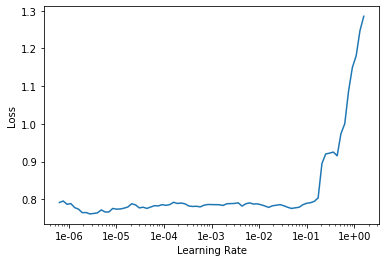

In [0]:
learn_classifier.recorder.plot()

##Training

In [0]:
learn_classifier.fit_one_cycle(2, 1e-04, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.723233,0.716186,0.512000,00:09
1,0.692901,0.706421,0.521000,00:09


In [0]:
learn_classifier.save("First")
learn_classifier.load('First');

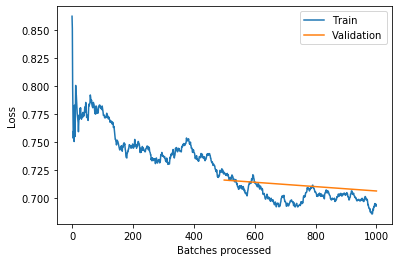

In [0]:
learn_classifier.recorder.plot_losses()

In [0]:
learn_classifier.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(5536, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(5536, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1200, out_features=50, bias=True)
      (2): ReLU(inplace=True)
      (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track

In [0]:
learn_classifier.unfreeze()
learn_classifier.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [61, 400]            0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
______________________________________________________________________
BatchNorm1d          [50]                 100        True      
________________________________________________

In [0]:
for index, layer in enumerate(learn_classifier.layer_groups):
  print('Layer Group Index: ', index, layer)

Layer Group Index:  0 Sequential(
  (0): Embedding(5536, 400, padding_idx=1)
  (1): EmbeddingDropout(
    (emb): Embedding(5536, 400, padding_idx=1)
  )
)
Layer Group Index:  1 Sequential(
  (0): WeightDropout(
    (module): LSTM(400, 1152, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  2 Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 1152, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  3 Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 400, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  4 Sequential(
  (0): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1200, out_features=50, bias=True)
      (2): ReLU(inplace=True)
      (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Dropout(p=0.1, inplace=False)
      (5): Linear(in_features=50, out_featu

In [0]:
def summary_trainable(learner):
  result = []
  total_params_element = 0
  def check_trainable(module):
    nonlocal total_params_element
    if len(list(module.children())) == 0:
      num_param = 0
      num_trainable_param = 0
      num_param_numel = 0
      for parameter in module.parameters():
        num_param += 1
        if parameter.requires_grad:
          num_param_numel += parameter.numel()
          total_params_element += parameter.numel()
          num_trainable_param += 1

      result.append({'module': module, 'num_param': num_param , 'num_trainable_param' : num_trainable_param, 'num_param_numel': num_param_numel})
  learner.model.apply(check_trainable)
  
  print("{: <85} {: <17} {:,<20} {: <40}".format('Module Name', 'Total Parameters', 'Trainable Parameters', '# Elements in Trainable Parametrs'))
  for row in result:
    print("{: <85} {: <17} {: <20} {: <40,}".format(row['module'].__str__(), row['num_param'], row['num_trainable_param'], row['num_param_numel']))
  print('Total number of parameters elements {:,}'.format(total_params_element))

In [0]:
learn_classifier.freeze()
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 0                    0                                       
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.freeze_to(-1)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 0                    0                                       
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.freeze_to(-2)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.freeze_to(-3)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.freeze_to(-4)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.freeze_to(-5) # equal to unfreeze
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [0]:
learn_classifier.freeze()
learn_classifier.unfreeze()
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND